In [1]:
# Load libraries and dependencies
import warnings
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from datetime import datetime

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# Read csv file into data frame
df = pd.read_csv("Crimes_-_2001_to_present.csv")
# arrest = df.loc[df['Arrest'] == True]
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071065,11700926,JC279725,05/26/2019 05:13:00 PM,036XX W DOUGLAS BLVD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,24.0,29.0,26,1152126.0,1893208.0,2019,06/30/2019 03:56:27 PM,41.862830,-87.717040,"(41.862830429, -87.717040084)"
7071066,24560,JC279072,05/26/2019 06:48:00 AM,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,True,False,...,25.0,28.0,01A,1167752.0,1893853.0,2019,07/16/2019 04:17:29 PM,41.864278,-87.659660,"(41.864278228, -87.659660218)"
7071067,24559,JC278908,05/26/2019 02:11:00 AM,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,25.0,28.0,01A,1167746.0,1893853.0,2019,06/02/2019 04:09:42 PM,41.864278,-87.659682,"(41.864278357, -87.659682244)"
7071068,11707734,JC287730,07/01/2014 07:30:00 AM,063XX S NORMAL BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,20.0,68.0,11,NaN,NaN,2014,06/02/2019 04:09:42 PM,NaN,NaN,NaN


In [3]:
# View min and max dates
df['Date'].min(), df['Date'].max()

('01/01/2001 01:00:00 AM', '12/31/2019 12:58:00 AM')

In [4]:
# If we wanted to drop attributes, the below code would be utilized

# cols = ['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']
# df.drop(cols, axis=1, inplace=True)
# df = df.sort_values('Date')
# df.isnull().sum()

In [5]:
# Reformat date and time using datetime
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [6]:
# View min and max dates to verify the conversion
df['Date'].min(), df['Date'].max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2020-02-10 23:58:00'))

In [7]:
# Set start and end dates since 2020 is incolmplete and will skew results
start_date = '2001-01-01 01:00:00'
end_date = '2019-12-31 00:58:00'

In [8]:
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)

In [9]:
df = df.loc[mask]
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,2001-01-01 11:00:00,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,2017-10-08 03:00:00,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,2017-03-28 14:00:00,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,2017-09-09 20:17:00,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,2017-08-26 10:00:00,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071065,11700926,JC279725,2019-05-26 17:13:00,036XX W DOUGLAS BLVD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,24.0,29.0,26,1152126.0,1893208.0,2019,06/30/2019 03:56:27 PM,41.862830,-87.717040,"(41.862830429, -87.717040084)"
7071066,24560,JC279072,2019-05-26 06:48:00,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,True,False,...,25.0,28.0,01A,1167752.0,1893853.0,2019,07/16/2019 04:17:29 PM,41.864278,-87.659660,"(41.864278228, -87.659660218)"
7071067,24559,JC278908,2019-05-26 02:11:00,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,25.0,28.0,01A,1167746.0,1893853.0,2019,06/02/2019 04:09:42 PM,41.864278,-87.659682,"(41.864278357, -87.659682244)"
7071068,11707734,JC287730,2014-07-01 07:30:00,063XX S NORMAL BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,20.0,68.0,11,NaN,NaN,2014,06/02/2019 04:09:42 PM,NaN,NaN,NaN


In [10]:
# Set the index to be the date 
df.index = pd.DatetimeIndex(df.Date)

In [11]:
# View total counts for Primary Type of offenses
df['Primary Type'].value_counts()

THEFT                                1489491
BATTERY                              1287727
CRIMINAL DAMAGE                       801543
NARCOTICS                             727427
ASSAULT                               441641
OTHER OFFENSE                         437634
BURGLARY                              399186
MOTOR VEHICLE THEFT                   324549
DECEPTIVE PRACTICE                    285834
ROBBERY                               264899
CRIMINAL TRESPASS                     201043
WEAPONS VIOLATION                      77669
PROSTITUTION                           69096
PUBLIC PEACE VIOLATION                 49497
OFFENSE INVOLVING CHILDREN             48181
CRIM SEXUAL ASSAULT                    29171
SEX OFFENSE                            26624
INTERFERENCE WITH PUBLIC OFFICER       16841
GAMBLING                               14569
LIQUOR LAW VIOLATION                   14313
ARSON                                  11580
HOMICIDE                               10046
KIDNAPPING

In [12]:
# View total counts for top 15 Primary Type of offenses
df['Primary Type'].value_counts().iloc[:15]

THEFT                         1489491
BATTERY                       1287727
CRIMINAL DAMAGE                801543
NARCOTICS                      727427
ASSAULT                        441641
OTHER OFFENSE                  437634
BURGLARY                       399186
MOTOR VEHICLE THEFT            324549
DECEPTIVE PRACTICE             285834
ROBBERY                        264899
CRIMINAL TRESPASS              201043
WEAPONS VIOLATION               77669
PROSTITUTION                    69096
PUBLIC PEACE VIOLATION          49497
OFFENSE INVOLVING CHILDREN      48181
Name: Primary Type, dtype: int64

In [13]:
df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

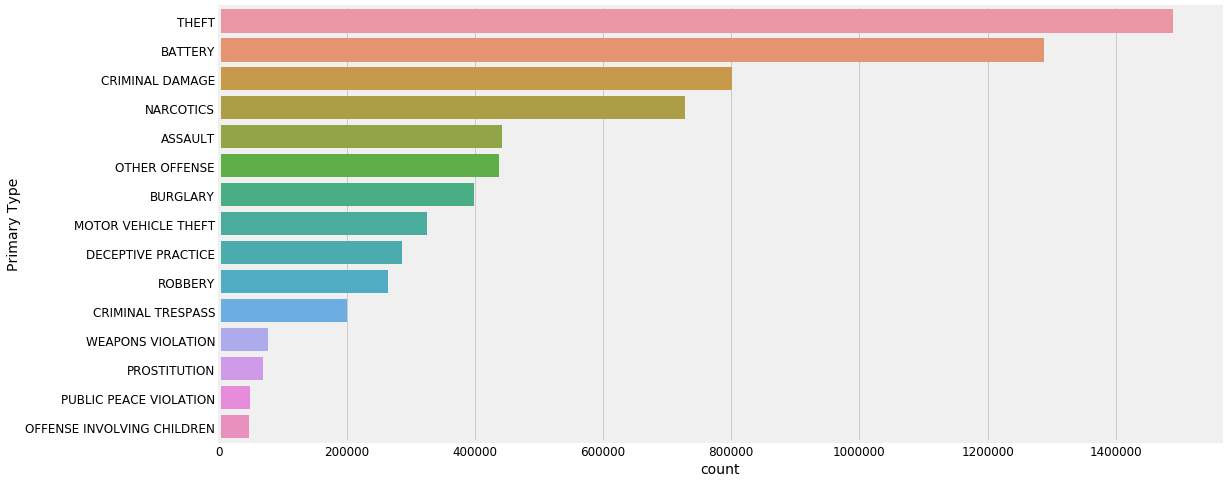

In [14]:
# Plot top 15 Primary Type of offenses
plt.figure(figsize = (16, 8))
sns.countplot(y= 'Primary Type', data = df, order = df['Primary Type'].value_counts().iloc[:15].index);
plt.savefig('Images/Primary_Type.png')

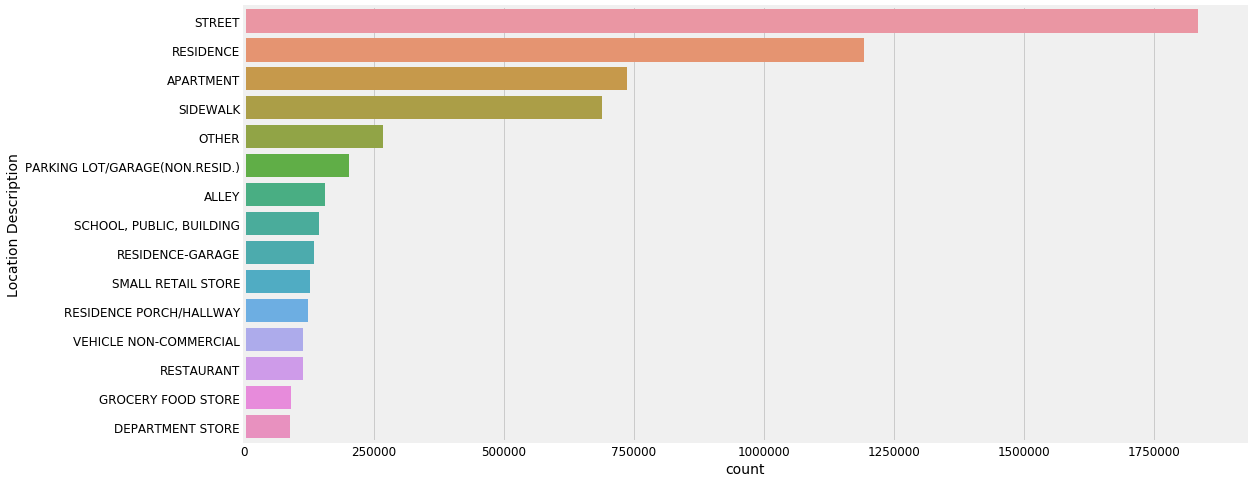

In [15]:
# Plot top 15 Location Descriptions where offenses occured
plt.figure(figsize = (16, 8))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:15].index);
plt.savefig('Images/Location_Description.png')

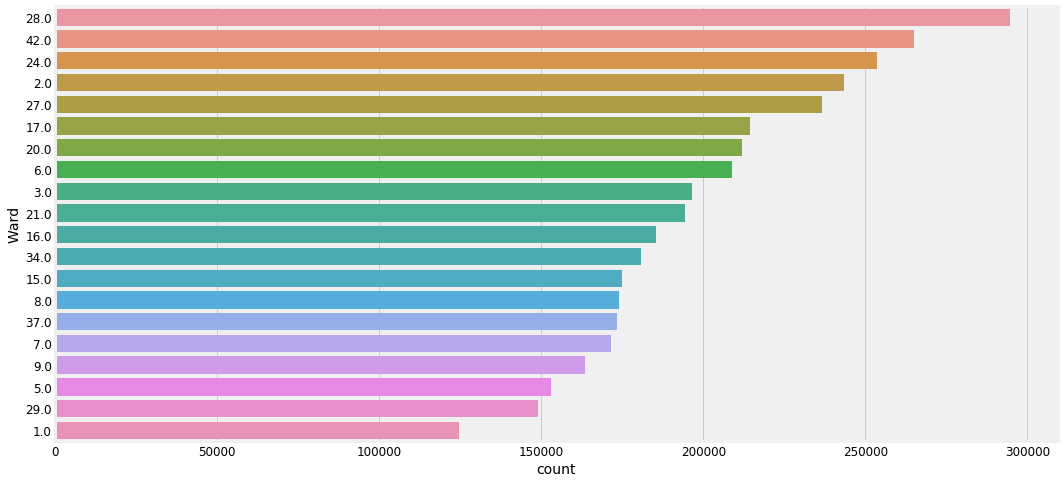

In [16]:
# Plot top 20 Wards with highest crime counts
plt.figure(figsize = (16, 8))
sns.countplot(y= 'Ward', data = df, order = df['Ward'].value_counts().iloc[:20].index);
plt.savefig('Images/Ward.png')

In [17]:
# Resample the data to get crime counts by year
yearly = df.resample('Y').size()
yearly

Date
2001-12-31    485314
2002-12-31    486762
2003-12-31    475952
2004-12-31    469391
2005-12-31    453721
2006-12-31    448129
2007-12-31    437033
2008-12-31    427081
2009-12-31    392740
2010-12-31    370368
2011-12-31    351846
2012-12-31    336078
2013-12-31    307224
2014-12-31    275444
2015-12-31    264322
2016-12-31    269294
2017-12-31    268505
2018-12-31    267899
2019-12-31    257856
Freq: A-DEC, dtype: int64

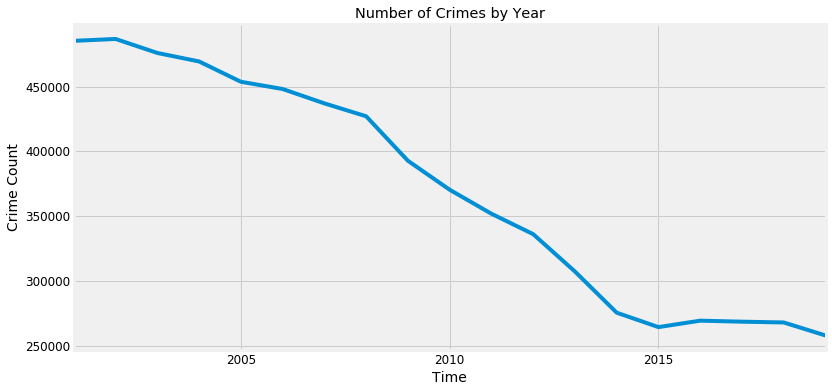

In [18]:
# Plot the crime counts by year
yearly.plot(figsize=(12, 6))
plt.title('Number of Crimes by Year')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.savefig('Images/Number_of_Crimes_by_Year.png')

In [19]:
# Resample the data to get crime counts by quarter
quarterly = df.resample('Q').size()
quarterly

Date
2001-03-31    111986
2001-06-30    123628
2001-09-30    130229
2001-12-31    119471
2002-03-31    110900
               ...  
2018-12-31     65361
2019-03-31     58246
2019-06-30     67777
2019-09-30     70966
2019-12-31     60867
Freq: Q-DEC, Length: 76, dtype: int64

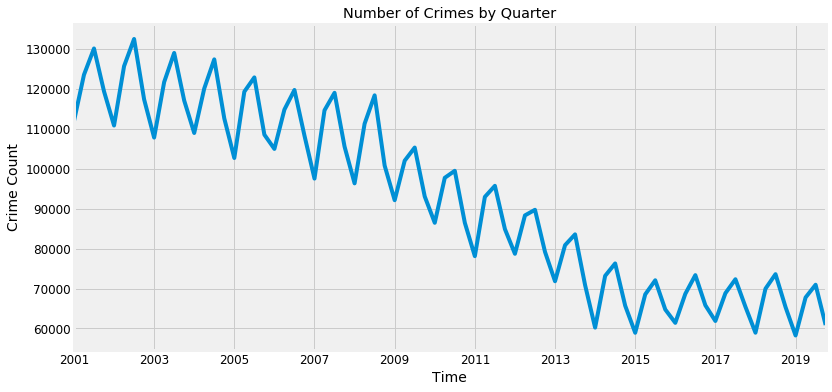

In [20]:
# Plot the crime counts by quarter
quarterly.plot(figsize=(12, 6))
plt.title('Number of Crimes by Quarter')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.savefig('Images/Number_of_Crimes_by_Quarter.png')

In [21]:
# Resample the data to get crime counts by month
monthly = df.resample('M').size()
monthly

Date
2001-01-31    37655
2001-02-28    33779
2001-03-31    40552
2001-04-30    40082
2001-05-31    41821
              ...  
2019-08-31    24112
2019-09-30    22171
2019-10-31    21415
2019-11-30    19626
2019-12-31    19826
Freq: M, Length: 228, dtype: int64

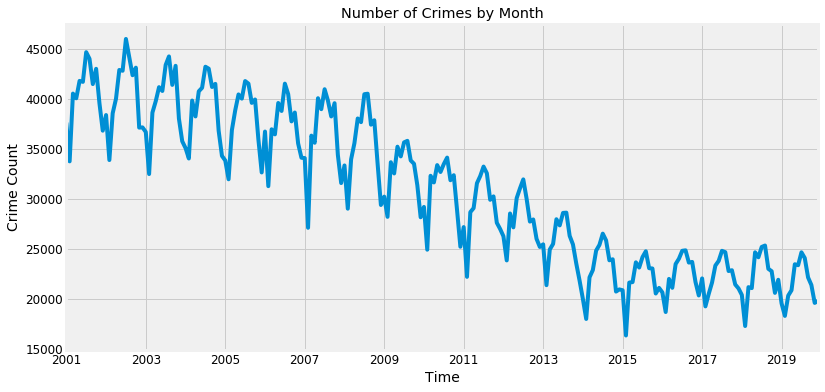

In [22]:
# Plot the crime counts by month
monthly.plot(figsize=(12, 6))
plt.title('Number of Crimes by Month')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.savefig('Images/Number_of_Crimes_by_Month.png')

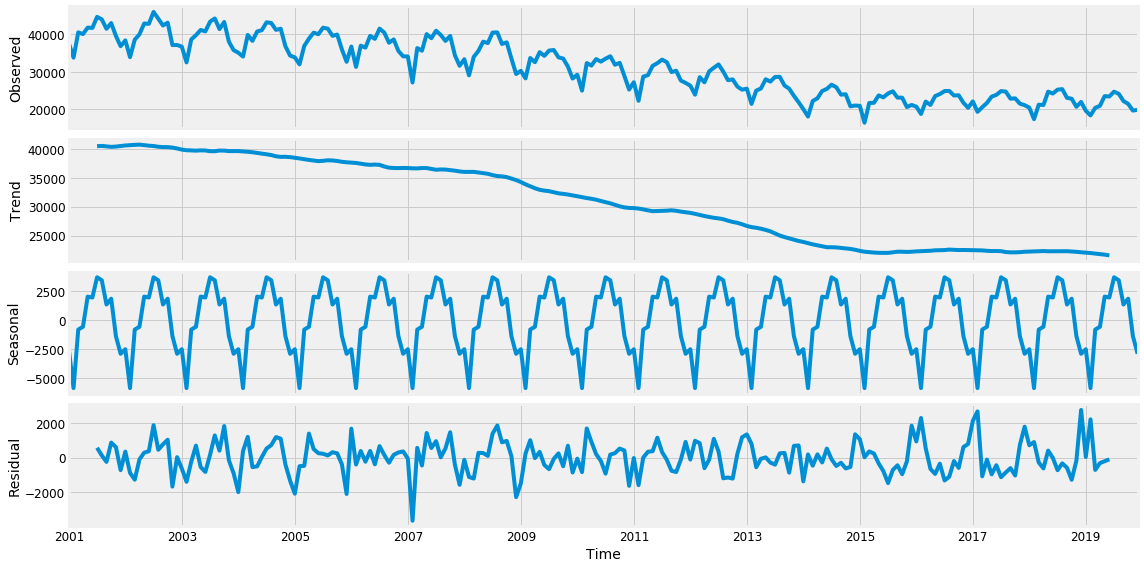

In [23]:
# Plot decomposition of monthly crime counts to view trend and seasonality
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
decomposition = sm.tsa.seasonal_decompose(monthly, model='additive')
fig = decomposition.plot()
plt.xlabel('Time')
plt.savefig('Images/Decomposition.png')

In [24]:
# Print examples of ARIMA parameters combinations
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
# Run a loop to get all parameter combinations for seasonal ARIMA to determine lowest AIC value
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly, 
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5352.961926936998
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4903.320408427457
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3825.659410368001
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3603.1251223291574
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3746.524660324604
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3718.9438401093785
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3611.662443468941
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3596.617624779546
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5170.75566477939
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4855.680766123147
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3738.4483130691087
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3526.2809495858946
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4880.205639952077
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4837.034501687531
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3560.514981774118
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3528.278365513158
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4192.334997648977
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3832.884136344789
ARIMA(0

In [26]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:3359.565414718487 was selected because it had the lowest AIC value
# This ensures our model will not overfit the data

mod = sm.tsa.statespace.SARIMAX(monthly,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1504      0.107      1.403      0.161      -0.060       0.361
ma.L1         -0.7585      0.068    -11.178      0.000      -0.891      -0.625
ar.S.L12       0.0664      0.046      1.450      0.147      -0.023       0.156
ma.S.L12      -0.6228      0.061    -10.219      0.000      -0.742      -0.503
sigma2      9.652e+05   7.89e+04     12.226      0.000     8.1e+05    1.12e+06


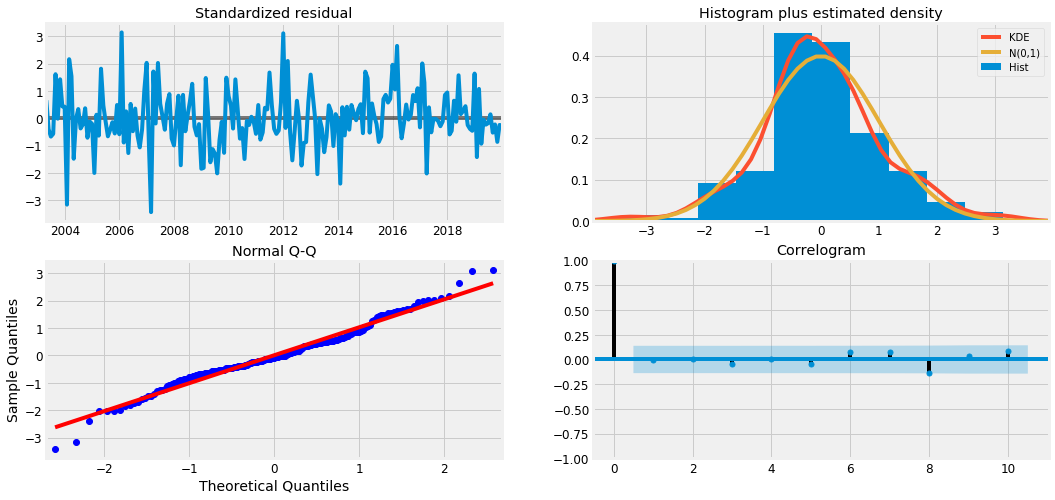

In [27]:
# Plot diagnostics on selected ARIMA model to ensure a good fit of data based on normally distributed data
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('Images/Diagnostics.png')

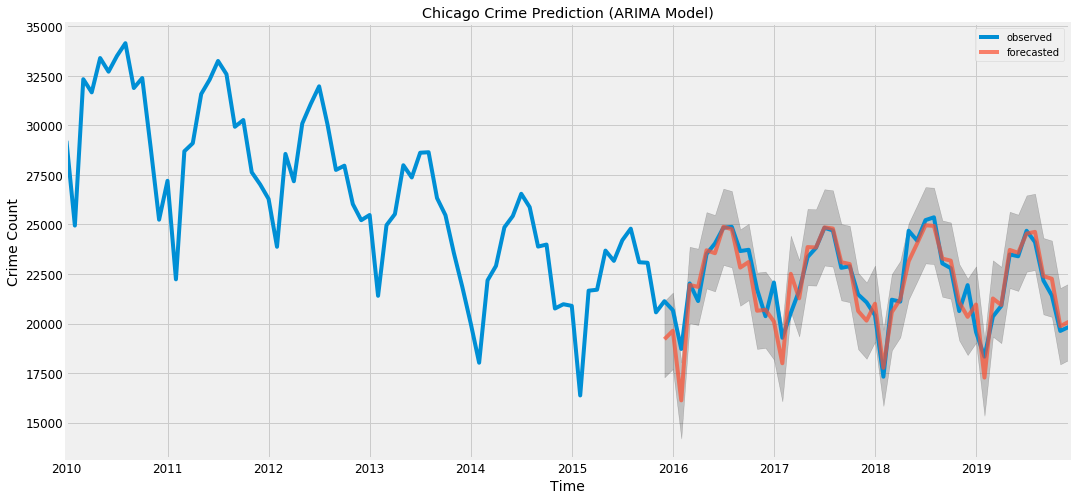

In [28]:
# Plot the predicted model against the actual data trend to view goodness of fit
pred = results.get_prediction(start=pd.to_datetime('2015-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='forecasted', alpha=.7, figsize=(16, 8))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('Crime Count')
plt.title('Chicago Crime Prediction (ARIMA Model)')
plt.legend()
plt.savefig('Images/Prediction_(ARIMA_Model).png')

In [29]:
# Determine how close the fit is between the true trend versus the forecasted trend
monthly_forecasted = pred.predicted_mean
monthly_truth = monthly['2015-12-31':]

mse = ((monthly_forecasted - monthly_truth) ** 2).mean()
print('The Mean Squared Error of the forecast is {}'.format(round(mse, 2)))

The Mean Squared Error of the forecast is 773345.69


In [30]:
# Determine the variation per month by the root mean squared error
print('The Root Mean Squared Error of the forecast is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of the forecast is 879.4


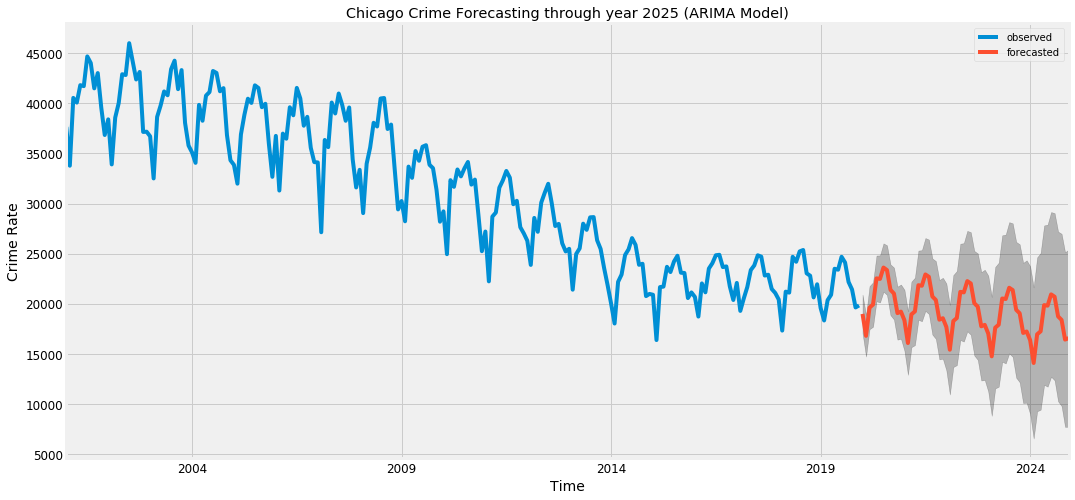

In [31]:
# Plot graph showing trend since 2001 and prediction through 2025.

pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()

ax = monthly.plot(label='observed', figsize=(16, 8))
pred_uc.predicted_mean.plot(ax=ax, label='forecasted')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Time')
ax.set_ylabel('Crime Rate')
plt.title('Chicago Crime Forecasting through year 2025 (ARIMA Model)')
plt.legend()
plt.savefig('Images/Forecasting_2001_2025(ARIMA_Model).png')

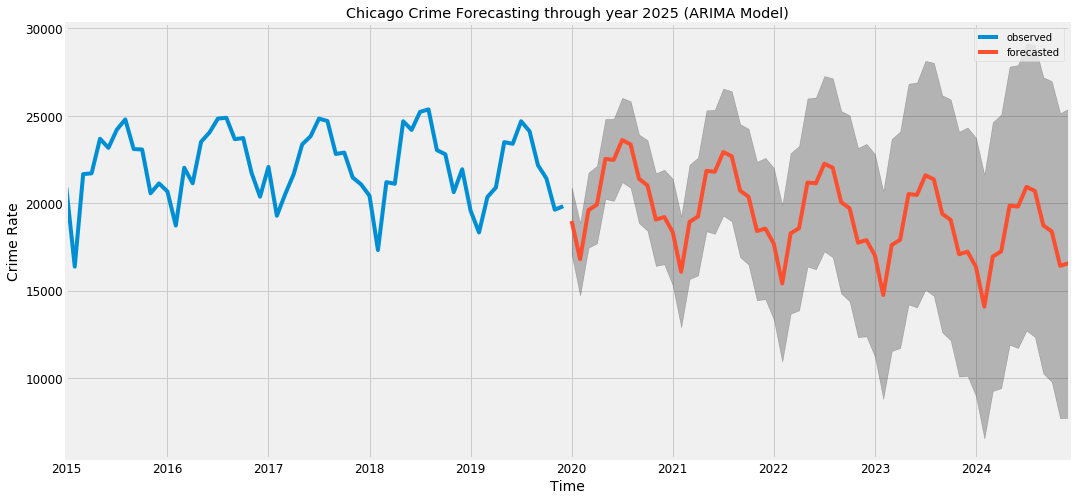

In [32]:
# Plot graph showing trend since 2015 and prediction through 2025.
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()

ax = monthly['2015':].plot(label='observed', figsize=(16, 8))
pred_uc.predicted_mean.plot(ax=ax, label='forecasted')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Time')
ax.set_ylabel('Crime Rate')
plt.title('Chicago Crime Forecasting through year 2025 (ARIMA Model)')
plt.legend()
plt.savefig('Images/Forecasting_2015_2025(ARIMA_Model).png')

In [33]:
# Gegt average count of crimes per month since 2001
average = monthly.mean(axis = 0, skipna = True) 
print('The average number of crimes per month since 2001 are: {}'.format(round(average)))

The average number of crimes per month since 2001 are: 30899


In [34]:
# Recall the root mean squared error value
print('The Root Mean Squared Error of the forecast is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of the forecast is 879.4


In [35]:
# Print percentage of how close the predicted model is to the actual trend
print('This means that the values predicited in the model are aboout {}% in the range of the actual data.'.format(round((np.sqrt(mse)/average)*100, 2)))

This means that the values predicited in the model are aboout 2.85% in the range of the actual data.
